# Figure 6. c) analysis

This notebook contains generates the heatmap of BIONIC predictions from Fig. 6 c).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import BIONIC predictions and subset to significantly predicted compounds.

In [2]:
results = pd.read_excel(
    "../data/chemical-genetics/BIONIC Chemical Sensitive Gene Predictions.xlsx",
    index_col=0,
    sheet_name="TS Sensitive Gene Predictions",
    engine="openpyxl"
)

results = results[results["Significant"] == "yes"]

results.head()

,Compound Bioprocesses,Number of Compound Bioprocesses,Predicted Enriched Bioprocesses (p-value),Number of Predicted Enriched Bioprocesses,Overlapping Bioprocesses,Number of Overlapping Bioprocesses,Ordered Hypergeometric p-value,-log10(p-value),Significant,Number of TS Sensitive Genes,Number of Overlapping BIONIC Predicted Sensitive Genes,TS Sensitive Genes,BIONIC Predicted Sensitive Genes,Overlapping Sensitive Genes,Additional BIONIC Predicted TS Sensitive Genes
Compound,,,,,,,,,,,,,,,
NP329,Vesicle traffic | tRNA wobble modification | C...,5,"Glycosylation, protein folding/targeting, cell...",1,"Glycosylation, protein folding/targeting, cell...",1,6.083498e-08,7.215847,yes,16,5,ROT1 KEG1 KRE5 RHO3 PAN1 DBP2 CMD1 SOG2 KRE9 I...,KRE5 KRE9 KEG1 BIG1 ROT1 TRS130 WBP1 TPT1 PKC1...,BIG1 KEG1 KRE5 ROT1 KRE9,PKC1 TRS130 GPI13 GPI17 SMP3 RHO1 GPI18 KAR2 G...
NPD7279,DNA replication & repair,1,DNA replication & repair (1.40707e-11),1,DNA replication & repair,1,8.670593e-06,5.061951,yes,3,3,NSE4 NSE3 MMS21,NSE5 SMC6 KRE29 NSE4 SMC5 NSE3 MMS21 UBC9 SMT3...,NSE4 MMS21 NSE3,ULP1 RFA1 NBP1 NSE1 POL31 SLD2 UBA2 KRE29 RRP1...
NPE498,"Glycosylation, protein folding/targeting, cell...",2,"Glycosylation, protein folding/targeting, cell...",1,"Glycosylation, protein folding/targeting, cell...",1,9.139312e-05,4.039086,yes,8,4,PKC1 IPP1 DPM1 CBK1 KRE5 TPT1 PGA1 PAN1,PGA1 KRE5 BIG1 GPI18 TPT1 SMP3 GAB1 GPI17 GPI1...,PKC1 TPT1 PGA1 KRE5,KRE9 SMP3 GPI17 GPI13 GPI18 GPI15 BIG1 KEG1 KA...
NPD5998,DNA replication & repair | Mitosis & chromosom...,3,Nuclear-cytoplasmic transport (0.000108227) | ...,2,Mitosis & chromosome segregation,1,1.562565e-03,2.806162,yes,6,2,SRB6 RFA1 MCM1 SLD3 NUP116 GFA1,NUP116 CDC34 RFA1 CTF8 NUP159 NSP1 NUP82 DBP5 ...,RFA1 NUP116,CDC53 UBC1 TRS20 CTF8 DBP5 PDS1 NUP145 CDC34 D...
NPE792,Protein degradation/turnover,1,"Glycosylation, protein folding/targeting, cell...",1,NaN,0,4.463483e-03,2.350326,yes,2,2,CDC48 UFD1,TPT1 PGA1 GPI18 BIG1 KAR2 KRE5 PKC1 ERD2 KEG1 ...,CDC48 UFD1,SEC62 PKC1 BIG1 GPI18 KEG1 ERD2 WBP1 OST1 GAB1...


Create the heatmap grid which consists of compounds as rows, and sensitive gene prediction rank as columns.

In [3]:
grid = []
genes_grid = []
for row in results.itertuples():
    true_hits = row[12].split(" ")
    true_hits_set = set(true_hits)
    predicted_hits = row[13].split(" ")

    binary = [1 if hit in true_hits_set else 0 for hit in predicted_hits]
    grid.append(binary)

    genes = [hit for hit in predicted_hits if hit in true_hits_set]
    genes_grid.append(genes)

Modify the name of each compound to include the number of correct predictions, and number of total sensitive genes.

In [4]:
names = []
for compound in results.index:
    n_hits = results.loc[compound, "Number of TS Sensitive Genes"]
    n_preds = results.loc[compound, "Number of Overlapping BIONIC Predicted Sensitive Genes"]
    names.append(f"{compound} ({n_preds}/{n_hits})")
results["Names"] = names
results.index = names

Plot the heatmap.

<Figure size 432x288 with 0 Axes>

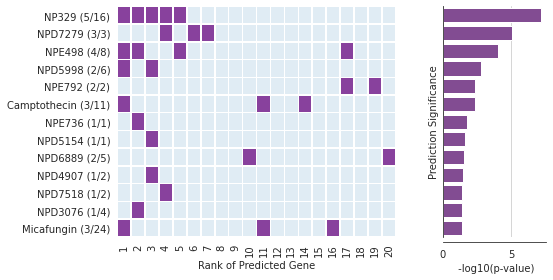

In [5]:
# create a DataFrame for the grid
grid = pd.DataFrame(grid, index=results.index, columns=list(range(1, 21)))

sns.set_style("white")

plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
sns.heatmap(grid, linewidths=0.5, cmap=["#e0ecf4", "#88419d"], cbar=False, ax=axs[0])
axs[0].set_xlabel("Rank of Predicted Gene")
bar = sns.barplot(
    data=results, x=" -log10(p-value)", y="Names", ax=axs[1], palette=["#88419d"]
)
sns.despine(ax=axs[1], offset={"bottom": 5})
axs[1].set_yticks([])
axs[1].grid("y")
axs[1].set_axisbelow(True)
axs[1].set_ylabel("Prediction Significance")
axs[1].set_aspect(1.3)
plt.tight_layout()
plt.show()

Individual genes were annotated by hand. The correctly predicted genes (purple squares) corresponding to the above figure are listed below.

In [6]:
genes_grid = [" ".join(genes) for genes in genes_grid]
genes_grid = pd.DataFrame(genes_grid, index=results.index)
genes_grid

,0
NP329 (5/16),KRE5 KRE9 KEG1 BIG1 ROT1
NPD7279 (3/3),NSE4 NSE3 MMS21
NPE498 (4/8),PGA1 KRE5 TPT1 PKC1
NPD5998 (2/6),NUP116 RFA1
NPE792 (2/2),CDC48 UFD1
Camptothecin (3/11),RFA1 NSE4 NUP116
NPE736 (1/1),TRS20
NPD5154 (1/1),PKC1
NPD6889 (2/5),TPT1 GPI10
NPD4907 (1/2),PKC1
